# Multi-Variable Scaling

Kim Thach *800793249*

ECGR 5090 - C01


## Initiliazing Workspace and Functions

This section will identify libraries and methods required to implement all following code. Including all libraries needed.

In [1]:
import numpy as np
import pandas as pd

# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Binary mapping
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression line, we would need numerical values and not string.
# List of variables to map
           
# Defining the map function
def binary_map(x):
 return x.map({'yes': 1, "no": 0})



In [ ]:
# Regression / Training Loop

# Training Loop

def compute_cost(X,y,theta):
    
    """ 
    Compute cost for linear regression.

    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent
        m= number of training examples
        n= number of features (including x0 column of ones)
    y: 1D array of labels/target value for each training example. Dimension (1 x m)

    theta :  1D array of fitting paramenters or weights. Dimension (1 x n)

    Output Parameters
    ----------------
    J: Scalar value.
    """

    predictions = X.dot(theta)
    errors = np.subtract(predictions,y)
    sqrErrors = np.square(errors)
    J = 1/(2*m)*np.sum(sqrErrors)
    
    return J


In [ ]:
def gradient_descent(X,y,theta,alpha,iterations):

    cost_hist = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta = theta - sum_delta
        cost_hist[i] = compute_cost(X,y,theta)

    return theta, cost_hist

## Import Data

For this example, we're looking at real estate data. 

In [2]:
# Import data

housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
# Identify some of the Data's parameters

print('The # of samples of homes in this dataset is ' + str(housing.shape[0]))
print('The # of features available in this dataset is ' + str(housing.shape[1]))


The # of samples of homes in this dataset is 545
The # of features available in this dataset is 13


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
# Identify some general statistical information about the dataset

housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
## Clean and Prep Data

In [ ]:
g = housing.columns.to_series().groupby(housing.dtypes).groups
print(g)

In [28]:
colvar = housing.select_dtypes(include=['object'])
colvar

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [37]:
listx = list(colvar.columns)
print(listx)
varlist = listx[:-1]
print(varlist)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [40]:
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [41]:
# Splitting the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the 

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 42)

df_train.shape


(381, 13)

In [42]:
df_test.shape

(164, 13)

In [57]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']
df_newtrain = df_train[num_vars]
df_newtest = df_test[num_vars]
df_newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
126,7160,3,1,1,2,5880000
363,3584,2,1,1,0,3710000
370,4280,2,1,1,2,3640000
31,7000,3,1,4,2,8400000
113,9620,3,1,1,2,6083000


In [45]:
df_newtrain.shape

(381, 6)

In [58]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# define standard scaler
# scaler = StandardScaler()

scaler = MinMaxScaler()
df_newtrain[num_vars] = scaler.fit_transform(df_newtrain[num_vars])
df_newtrain.head(20)

,area,bedrooms,bathrooms,stories,parking,price
126,0.378694,0.4,0.000000,0.000000,0.666667,0.393333
363,0.132921,0.2,0.000000,0.000000,0.000000,0.186667
370,0.180756,0.2,0.000000,0.000000,0.666667,0.180000
31,0.367698,0.4,0.000000,1.000000,0.666667,0.633333
113,0.547766,0.4,0.000000,0.000000,0.666667,0.412667
222,0.516564,0.2,0.000000,0.000000,0.666667,0.286667
462,0.035052,0.4,0.000000,0.333333,0.000000,0.126667
177,0.302405,0.4,0.000000,0.000000,0.000000,0.332667
57,0.505155,0.6,0.333333,1.000000,0.333333,0.523333
244,0.252234,0.4,0.000000,0.333333,0.000000,0.266667


In [66]:
y_newtrain = df_newtrain.pop('price')
x_newtrain = df_newtrain


126    0.393333
363    0.186667
370    0.180000
31     0.633333
113    0.412667
         ...   
71     0.476667
106    0.420000
270    0.246667
435    0.146667
102    0.423333
Name: price, Length: 381, dtype: float64
         area  bedrooms  bathrooms   stories   parking
126  0.378694       0.4   0.000000  0.000000  0.666667
363  0.132921       0.2   0.000000  0.000000  0.000000
370  0.180756       0.2   0.000000  0.000000  0.666667
31   0.367698       0.4   0.000000  1.000000  0.666667
113  0.547766       0.4   0.000000  0.000000  0.666667
..        ...       ...        ...       ...       ...
71   0.298969       0.6   0.333333  1.000000  0.000000
106  0.261168       0.6   0.333333  0.000000  0.000000
270  0.195876       0.4   0.333333  0.666667  0.333333
435  0.164261       0.2   0.000000  0.000000  0.000000
102  0.264605       0.4   0.333333  1.000000  0.333333

[381 rows x 5 columns]


In [67]:
x_newtrain.head()

,area,bedrooms,bathrooms,stories,parking
126,0.378694,0.4,0.0,0.0,0.666667
363,0.132921,0.2,0.0,0.0,0.000000
370,0.180756,0.2,0.0,0.0,0.666667
31,0.367698,0.4,0.0,1.0,0.666667
113,0.547766,0.4,0.0,0.0,0.666667


In [68]:
y_newtrain.head()

126    0.393333
363    0.186667
370    0.180000
31     0.633333
113    0.412667
Name: price, dtype: float64

In [69]:
Y = y_newtrain.values
Y

array([0.39333333, 0.18666667, 0.18      , 0.63333333, 0.41266667,
       0.28666667, 0.12666667, 0.33266667, 0.52333333, 0.26666667,
       0.65      , 0.68666667, 0.16666667, 0.49333333, 0.27266667,
       0.24666667, 0.25933333, 0.19333333, 0.43333333, 0.33      ,
       0.31333333, 0.26333333, 0.65666667, 0.08666667, 0.13036667,
       0.06666667, 0.86666667, 0.40666667, 0.55333333, 0.226     ,
       0.22366667, 0.7       , 0.54333333, 0.3       , 0.15933333,
       0.99666667, 0.25066667, 0.2       , 0.51333333, 0.30666667,
       0.06      , 0.41333333, 0.18666667, 0.23333333, 0.63333333,
       0.27333333, 0.3       , 0.63933333, 0.8       , 0.33      ,
       0.54      , 0.415     , 0.59333333, 0.35666667, 0.06666667,
       0.4       , 0.16333333, 0.40666667, 0.06666667, 0.3       ,
       0.33333333, 0.17666667, 0.28      , 0.36666667, 0.31      ,
       0.15333333, 0.14666667, 0.266     , 0.23333333, 0.15666667,
       0.086     , 0.37166667, 0.15666667, 0.49      , 0.24   

In [70]:
X0 = df_newtrain.values[:,0]
X0

array([0.37869416, 0.13292096, 0.18075601, 0.36769759, 0.54776632,
       0.51656357, 0.03505155, 0.3024055 , 0.50515464, 0.25223368,
       0.49140893, 0.47079038, 0.29072165, 0.79381443, 0.19656357,
       0.16666667, 0.12783505, 0.0828866 , 0.29896907, 0.19587629,
       0.34020619, 0.12783505, 0.2       , 0.1257732 , 0.05140893,
       0.12714777, 0.40206186, 0.36082474, 0.29896907, 0.30309278,
       0.13402062, 0.34020619, 0.18213058, 0.21443299, 0.16426117,
       0.40206186, 0.22680412, 0.25085911, 0.29896907, 0.41484536,
       0.11092784, 0.34020619, 0.16494845, 0.13676976, 0.26460481,
       0.1532646 , 0.77319588, 0.29896907, 1.        , 0.3814433 ,
       0.39793814, 0.10927835, 0.50515464, 0.08020619, 0.21924399,
       0.32783505, 0.03402062, 0.35395189, 0.10721649, 0.25773196,
       0.56013746, 0.19587629, 0.18350515, 0.20962199, 0.4467354 ,
       0.16975945, 0.1257732 , 0.16838488, 0.28865979, 0.21546392,
       0.16151203, 0.3443299 , 0.12371134, 0.41580756, 0.19587

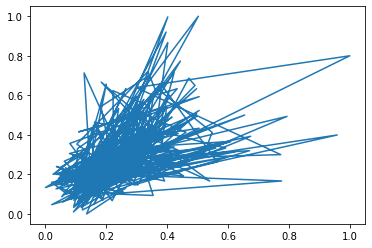

In [71]:
plt.figure()
plt.plot(X0,Y)

Text(0, 0.5, 'Price ($)')

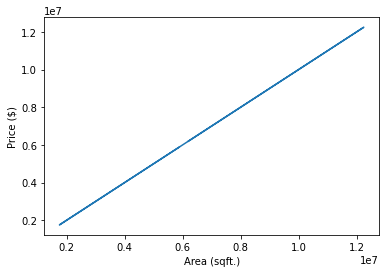

In [74]:
plt.figure()
plt.plot(df_train.values[:,0],df_train['price'])
plt.xlabel('Area (sqft.)')
plt.ylabel('Price ($)')